# **Kredi Onayı Sınıflandırması**

## **Veri Seti Hikayesi**

### **Değişkenler**
1. **Age(Yaş):** Başvuru yapan kişilerin yaşıdır.
2. **Annual Income(Yıllık Gelir):** Başvuranın bir yıl boyunca elde ettiği toplam geliridir.
3. **Credit Score(Kredibilite Puanı):** Başvuranın finansal geçmişine dayanarak kredi veren kurumlar tarafından hesaplanan güvenilirlik puanıdır.
4. **Debt-to-Income Ratio(Borç-Gelir Oranı):** Başvuranın toplam borcunun yıllık gelirine oranıdır.
5. **Loan Amount(Talep Edilen Kredi Miktarı):** Başvuranın ihtiyaç duyduğu kredi tutarını ifade eder.
6. **Loan Duration(Kredi Süresi):** Kredinin geri ödeme için planlanan toplam süresidir.
7. **Networth(Toplam Mali Değer):** Başvuranın varlıkları ile borçları arasındaki farktır.
8. **Payment History(Ödeme Geçmişi):** Başvuranın geçmiş borç ve kredi ödemelerindeki düzenliliği ifade eder.
9. **Number Of Dependents(Evdeki Bağımlıların Sayısı):** Başvuranın finansal olarak desteklediği kişilerin sayısıdır.
10. **Bankruptcy History(İflas Kaydı):** Başvuranın geçmişte iflas ilan edip etmediğini gösterir.
11. **Credit Card Utilization Rate(Kredi Kartı Kullanım Yüzdesi):** Başvuranın kredi kartı limitinin ne kadarının kullanıldığını ifade eder.
12. **Number Of Open Credit Lines(Aktif Kredi Hatları):** Başvuranın hâlihazırda sahip olduğu açık kredi hesaplarının sayısıdır.
14. **Savings Account Balance(Tasarruf Hesabı Bakiyesi):** Başvuranın tasarruf hesabında biriktirdiği toplam fon miktarıdır.(Bir bireyin tasarruf hesabı, gelecekteki mali ihtiyaçlar veya beklenmedik durumlar için ayrılmış birikimlerini temsil eder.)
15. **Education Level(Eğtiim Seviyesi):** Başvuranın sahip olduğu en yüksek eğitim düzeyidir.
16. **Employment Status(İstihdam Durumu):** Başvuranın iş durumunu (çalışıyor, işsiz, emekli vb.) ifade eder.
17. **Job Tenure(İş Süresi):** Başvuranın mevcut işinde çalıştığı toplam süredir.
18. **Loan Approved:** Başvuranın kredisinin onaylanıp onaylanmadığını(onaylandıysa:1, onaylanmadıysa:0) ifade eder.

In [5]:
#Veri setinin dahil edilmesi
import pandas as pd
file_path = "loan.xlsx"
df = pd.read_excel(file_path)
df.head()

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,LoanAmount,LoanDuration,NumberOfDependents,CreditCardUtilizationRate,NumberOfOpenCreditLines,DebtToIncomeRatio,BankruptcyHistory,PaymentHistory,SavingsAccountBalance,JobTenure,NetWorth,LoanApproved
0,NaN,39948.0,617.0,Employed,Master,13152.0,48.0,2.0,0.354418,1.0,0.358336,0,29.0,7632.0,11.0,126928.0,0
1,58.0,69084.0,545.0,Employed,High-School,37898.0,96.0,1.0,0.267587,2.0,0.436244,0,27.0,NaN,5.0,99452.0,0
2,37.0,103264.0,594.0,Employed,Associate,9184.0,36.0,1.0,NaN,0.0,0.078884,0,26.0,1555.0,5.0,227019.0,1
3,37.0,178310.0,626.0,Self-Employed,Master,15433.0,72.0,0.0,0.102211,5.0,0.259366,0,16.0,2118.0,5.0,27071.0,1
4,49.0,97345.0,516.0,Employed,High-School,19634.0,12.0,5.0,0.209768,5.0,0.395568,0,19.0,781.0,5.0,38621.0,1


## **Veri Setini Tanıma**

In [7]:
#Veri setindeki değişkenlerin bilgileri
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        9966 non-null   float64
 1   AnnualIncome               9968 non-null   float64
 2   CreditScore                9967 non-null   float64
 3   EmploymentStatus           10000 non-null  object 
 4   EducationLevel             10000 non-null  object 
 5   LoanAmount                 9966 non-null   float64
 6   LoanDuration               9967 non-null   float64
 7   NumberOfDependents         9967 non-null   float64
 8   CreditCardUtilizationRate  9967 non-null   float64
 9   NumberOfOpenCreditLines    9967 non-null   float64
 10  DebtToIncomeRatio          9967 non-null   float64
 11  BankruptcyHistory          10000 non-null  int64  
 12  PaymentHistory             9967 non-null   float64
 13  SavingsAccountBalance      9999 non-null   floa

In [8]:
#Veri setinin boyutu
df.shape

(10000, 17)

In [9]:
#Veri setindeki sütunlar
df.columns

Index(['Age', 'AnnualIncome', 'CreditScore', 'EmploymentStatus',
       'EducationLevel', 'LoanAmount', 'LoanDuration', 'NumberOfDependents',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'DebtToIncomeRatio', 'BankruptcyHistory', 'PaymentHistory',
       'SavingsAccountBalance', 'JobTenure', 'NetWorth', 'LoanApproved'],
      dtype='object')

In [10]:
#Sayısal değişkenler hakkında bilgiler-Betimsel İstatistikler
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,9966.0,40.652017,11.485627,18.000000,33.000000,41.000000,48.000000,8.000000e+01
AnnualIncome,9968.0,72787.766352,47897.462602,15000.000000,38217.500000,61043.000000,93937.250000,4.853410e+05
CreditScore,9967.0,575.412662,50.660929,362.000000,544.000000,582.000000,612.000000,7.120000e+02
LoanAmount,9966.0,23140.097331,12685.390851,3674.000000,14505.250000,20302.000000,28476.250000,1.586860e+05
LoanDuration,9967.0,52.824320,23.759809,12.000000,36.000000,48.000000,60.000000,1.200000e+02
NumberOfDependents,9967.0,1.509281,1.390129,0.000000,0.000000,1.000000,3.000000,5.000000e+00
CreditCardUtilizationRate,9967.0,0.285909,0.159888,0.000974,0.160696,0.264436,0.389791,9.173801e-01
NumberOfOpenCreditLines,9967.0,2.994983,1.714927,0.000000,2.000000,3.000000,4.000000,1.100000e+01
DebtToIncomeRatio,9967.0,0.286167,0.160050,0.001720,0.160768,0.265934,0.389454,9.022527e-01
BankruptcyHistory,10000.0,0.044900,0.207095,0.000000,0.000000,0.000000,0.000000,1.000000e+00


In [11]:
#Kategorik değişkenlerin gözetilmesi
from pandas.api.types import CategoricalDtype
cat_data = df.select_dtypes(include = ["object"])
for sutun in cat_data:
    print(cat_data[sutun].value_counts())

EmploymentStatus
Employed         8555
Self-Employed     825
Unemployed        620
Name: count, dtype: int64
EducationLevel
Bachelor       3130
High-School    2587
Associate      1906
Master         1760
Doctorate       617
Name: count, dtype: int64


In [12]:
#Object türünden kategoriye dönüşüm ve ordinal hale getirme
es_cat = ["Unemployed", "Self-Employed", "Employed"]
df["EmploymentStatus"] = pd.Categorical(df["EmploymentStatus"], categories = es_cat, ordered = True)
el_cat = ["High-School", "Associate", "Bachelor", "Master", "Doctorate"]
df["EducationLevel"] = pd.Categorical(df["EducationLevel"], categories = el_cat, ordered = True)

In [13]:
df.dtypes

Age                           float64
AnnualIncome                  float64
CreditScore                   float64
EmploymentStatus             category
EducationLevel               category
LoanAmount                    float64
LoanDuration                  float64
NumberOfDependents            float64
CreditCardUtilizationRate     float64
NumberOfOpenCreditLines       float64
DebtToIncomeRatio             float64
BankruptcyHistory               int64
PaymentHistory                float64
SavingsAccountBalance         float64
JobTenure                     float64
NetWorth                      float64
LoanApproved                    int64
dtype: object

In [14]:
df.EmploymentStatus.head()

0         Employed
1         Employed
2         Employed
3    Self-Employed
4         Employed
Name: EmploymentStatus, dtype: category
Categories (3, object): ['Unemployed' < 'Self-Employed' < 'Employed']

In [15]:
df.EducationLevel.head()

0         Master
1    High-School
2      Associate
3         Master
4    High-School
Name: EducationLevel, dtype: category
Categories (5, object): ['High-School' < 'Associate' < 'Bachelor' < 'Master' < 'Doctorate']

In [16]:
#Boş değerlerin gözetilmesi
df.isnull().sum()

Age                          34
AnnualIncome                 32
CreditScore                  33
EmploymentStatus              0
EducationLevel                0
LoanAmount                   34
LoanDuration                 33
NumberOfDependents           33
CreditCardUtilizationRate    33
NumberOfOpenCreditLines      33
DebtToIncomeRatio            33
BankruptcyHistory             0
PaymentHistory               33
SavingsAccountBalance         1
JobTenure                    34
NetWorth                     33
LoanApproved                  0
dtype: int64

## **Veri Setinin Görselleştirilmesi**

#### **Barplot Grafiği**

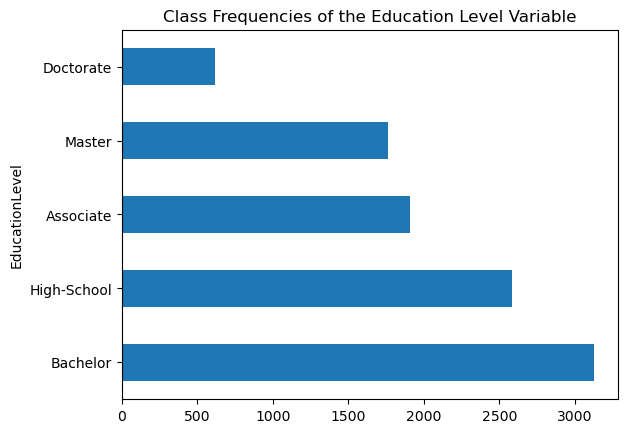

In [19]:
#Eğitim seviyelerinin çubuk grafiği ile incelenmesi
df["EducationLevel"].value_counts().plot.barh().set_title("Class Frequencies of the Education Level Variable");

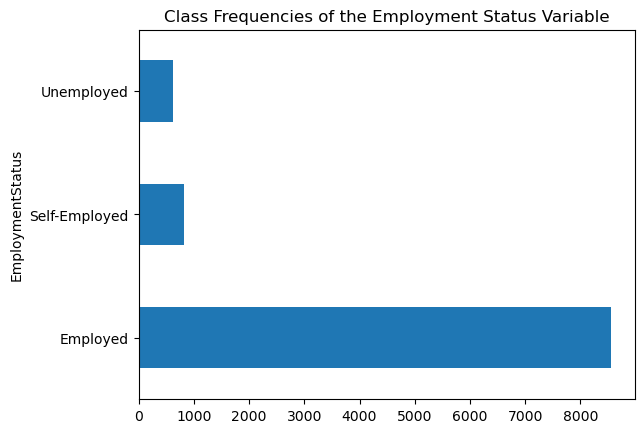

In [20]:
#İstihdam durumlarının çubuk grafiği ile incelenmesi
df["EmploymentStatus"].value_counts().plot.barh().set_title("Class Frequencies of the Employment Status Variable");

#### **Boxplot Grafiği**

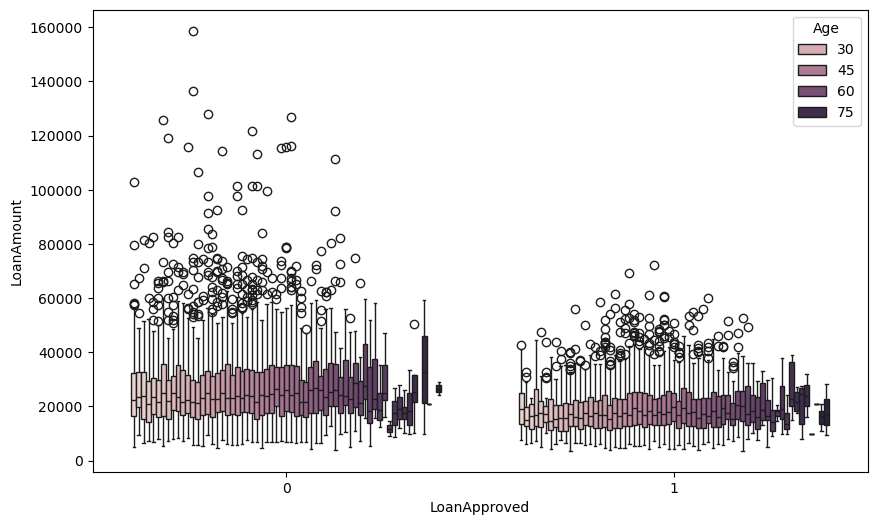

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

#Yaş değişkenine göre kredi miktarının onaylanmasının kutu grafiği ile incelenmesi
plt.figure(figsize=(10, 6))
sns.boxplot(x = "LoanApproved", y = "LoanAmount", hue = "Age", data = df);
plt.show()

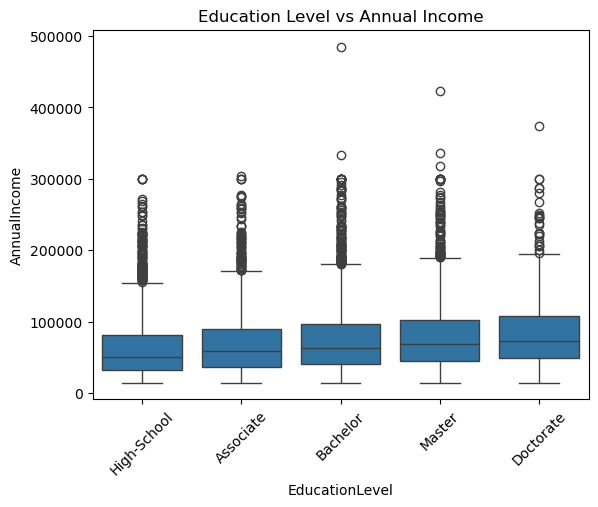

In [23]:
#Eğitim seviyelerine göre yıllık gelirlerin aralığının kutu grafiği ile incelenmesi
sns.boxplot(x='EducationLevel', y='AnnualIncome', data=df)
plt.title('Education Level vs Annual Income')
plt.xticks(rotation=45)
plt.show()

#### **Point Plot Grafiği**

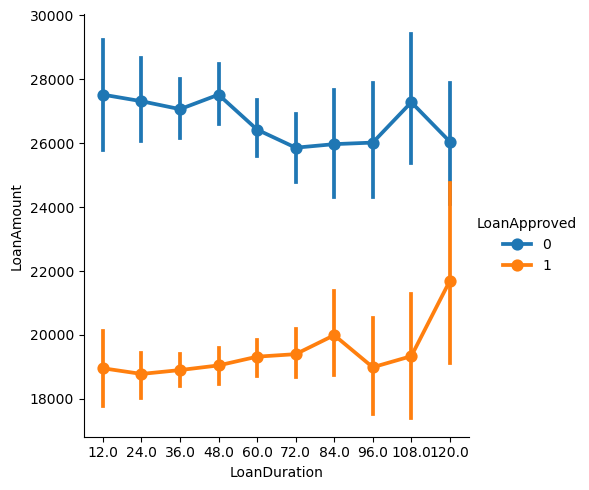

In [25]:
#Kredi miktarı ve kredi süresi arasındaki ilişkinin onaylanmaya etkisinin nokta grafiği ile gösterilmesi
sns.catplot(x = "LoanDuration", y = "LoanAmount", hue = "LoanApproved", kind = "point", data = df);

#### **Scatterplot Grafiği**

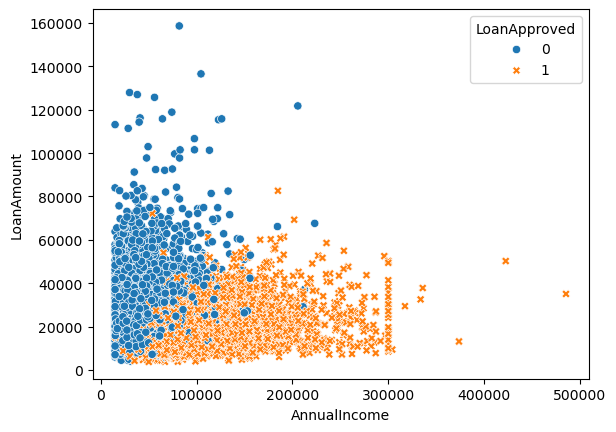

In [27]:
#Yıllık gelir ile kredi miktarının arasındaki ilişkinin onaylanmaya etkisinin dağılım grafiği ile gösterilmesi
sns.scatterplot(x = "AnnualIncome", y = "LoanAmount", hue= "LoanApproved", style = "LoanApproved", data = df);

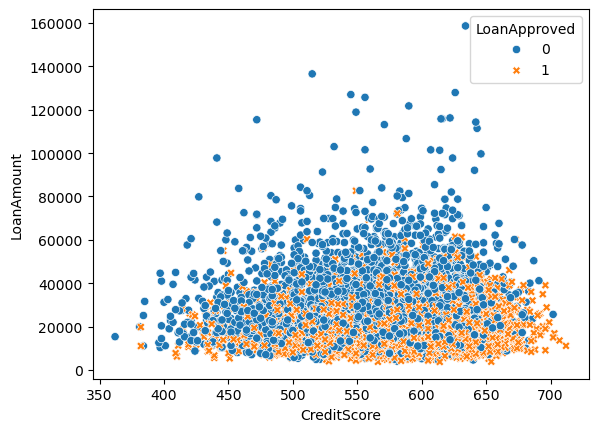

In [28]:
#Kredibilite puanı ve kredi miktarının arasındaki ilişkinin onaylanmaya etkisinin dağılım grafiği ile gösterilmesi
sns.scatterplot(x = "CreditScore", y = "LoanAmount", hue= "LoanApproved", style = "LoanApproved", data = df);

#### **LM Plot ile Doğrusal İlişkinin Gösterilmesi**

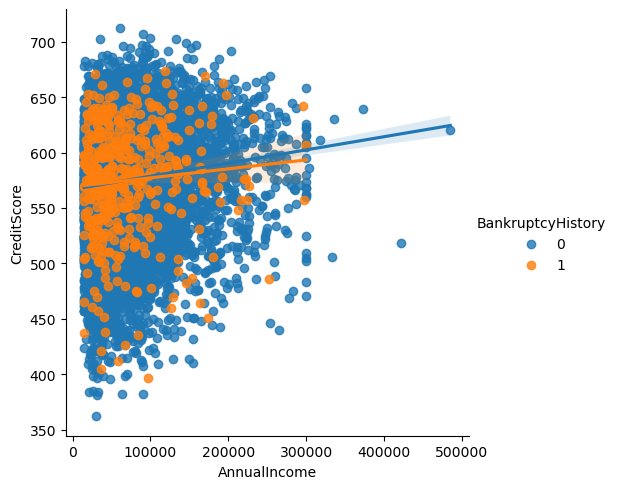

In [30]:
#Kredibilite puanı ve yıllık gelir arasındaki ilişkinin onaylanmaya etkisinin dağılım grafiği ile gösterilmesi
sns.lmplot(x = "AnnualIncome", y = "CreditScore", hue = "BankruptcyHistory", data = df);

## **Aykırı Değerlerin Boxplot ile Tespiti ve Baskılanması**

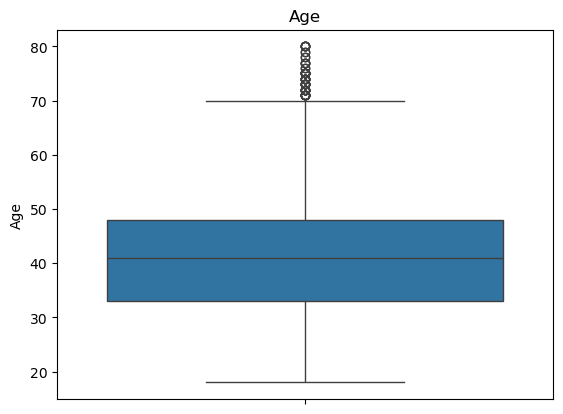

Age sütununda toplam 64 aykırı değer var.
Alt sınır: 10.5
Üst sınır: 70.5
Aykırı değerler: [72.0, 76.0, 71.0, 78.0, 71.0, 71.0, 73.0, 74.0, 77.0, 75.0] 



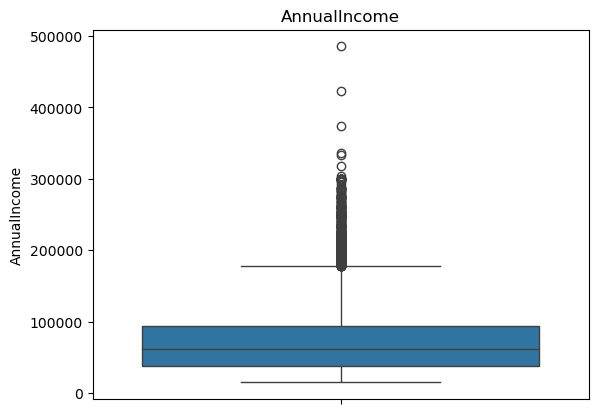

AnnualIncome sütununda toplam 406 aykırı değer var.
Alt sınır: -45362.125
Üst sınır: 177516.875
Aykırı değerler: [178310.0, 272693.0, 190445.0, 259639.0, 177855.0, 196442.0, 300000.0, 197755.0, 179664.0, 190649.0] 



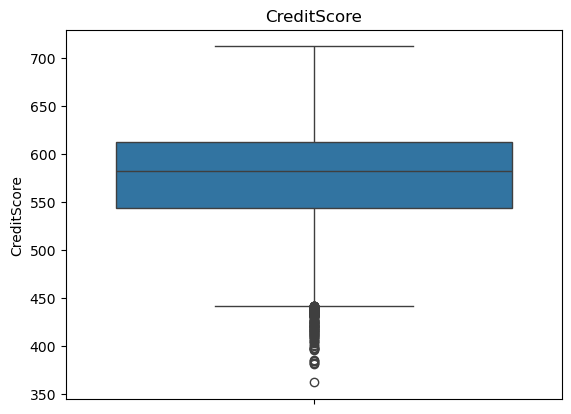

CreditScore sütununda toplam 127 aykırı değer var.
Alt sınır: 442.0
Üst sınır: 714.0
Aykırı değerler: [439.0, 439.0, 438.0, 441.0, 424.0, 427.0, 430.0, 433.0, 421.0, 385.0] 



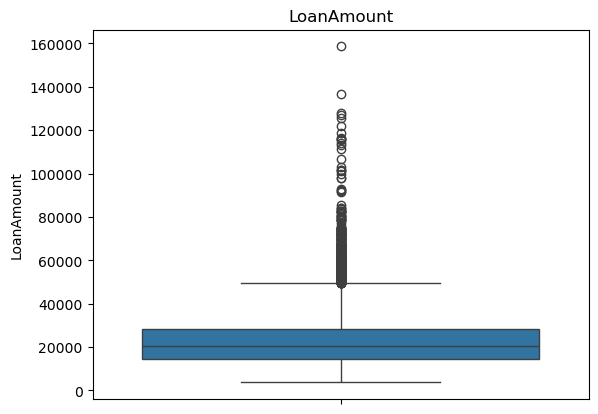

LoanAmount sütununda toplam 400 aykırı değer var.
Alt sınır: -6451.25
Üst sınır: 49432.75
Aykırı değerler: [53987.0, 66582.0, 51374.0, 61376.0, 51696.0, 52609.0, 53420.0, 63485.0, 55889.0, 54146.0] 



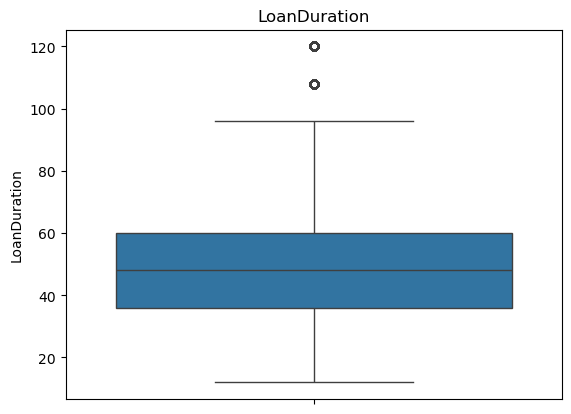

LoanDuration sütununda toplam 421 aykırı değer var.
Alt sınır: 0.0
Üst sınır: 96.0
Aykırı değerler: [108.0, 108.0, 120.0, 120.0, 120.0, 108.0, 120.0, 120.0, 120.0, 108.0] 

NumberOfDependents sütununda aykırı değer yok.



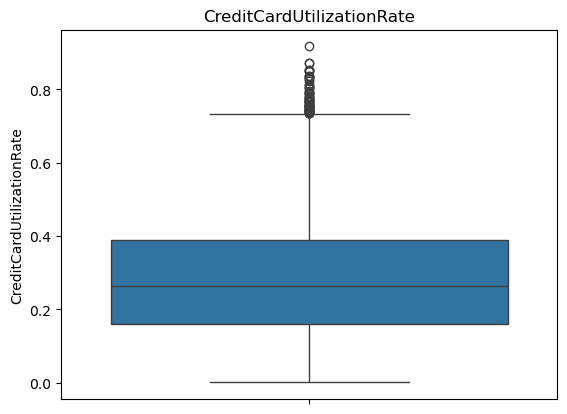

CreditCardUtilizationRate sütununda toplam 63 aykırı değer var.
Alt sınır: -0.18294746336377313
Üst sınır: 0.7334340821915848
Aykırı değerler: [0.773982535989138, 0.8533589544452111, 0.7397513296179165, 0.7661748793640728, 0.8715007180570342, 0.7447177977805316, 0.7912352289652577, 0.7657462226167481, 0.8288677690736591, 0.8085704227911298] 



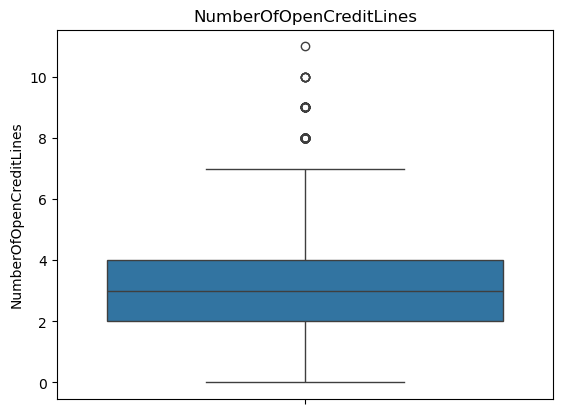

NumberOfOpenCreditLines sütununda toplam 110 aykırı değer var.
Alt sınır: -1.0
Üst sınır: 7.0
Aykırı değerler: [8.0, 8.0, 8.0, 8.0, 10.0, 8.0, 8.0, 9.0, 8.0, 8.0] 



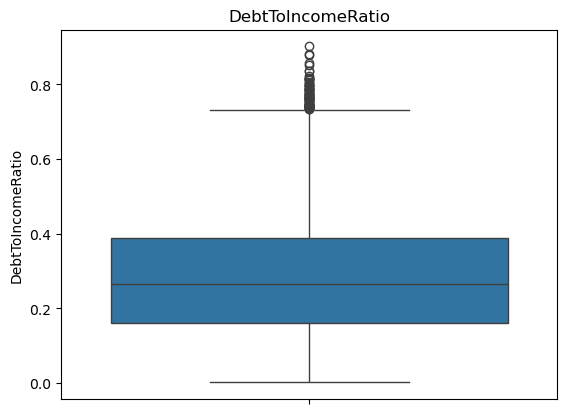

DebtToIncomeRatio sütununda toplam 70 aykırı değer var.
Alt sınır: -0.182259726697186
Üst sınır: 0.7324822052335072
Aykırı değerler: [0.8066258367442091, 0.7399944136333448, 0.8145258375925051, 0.7492221625727429, 0.7977449644591506, 0.7359240497423638, 0.8802357028754301, 0.7673675910114945, 0.811771985760107, 0.8582646801929338] 



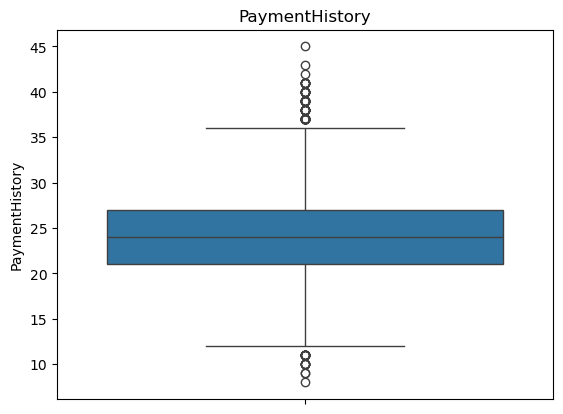

PaymentHistory sütununda toplam 117 aykırı değer var.
Alt sınır: 12.0
Üst sınır: 36.0
Aykırı değerler: [38.0, 10.0, 41.0, 10.0, 41.0, 37.0, 38.0, 11.0, 38.0, 39.0] 



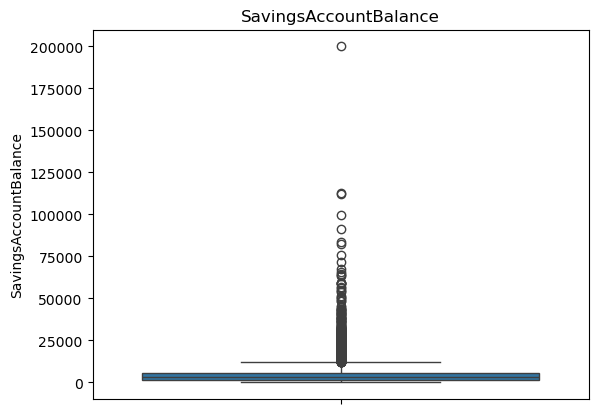

SavingsAccountBalance sütununda toplam 785 aykırı değer var.
Alt sınır: -4947.0
Üst sınır: 12397.0
Aykırı değerler: [13247.0, 14921.0, 30896.0, 21204.0, 21032.0, 21978.0, 16833.0, 13605.0, 12973.0, 21809.0] 



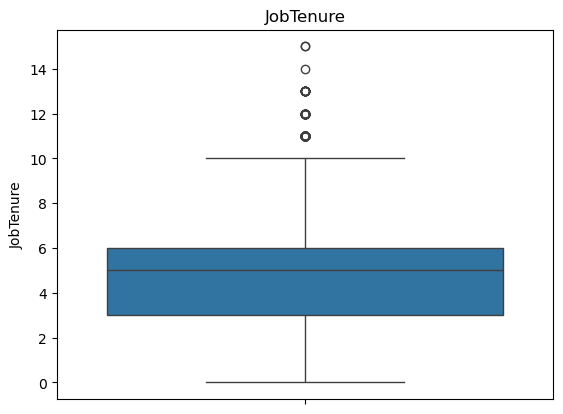

JobTenure sütununda toplam 132 aykırı değer var.
Alt sınır: -1.5
Üst sınır: 10.5
Aykırı değerler: [11.0, 12.0, 11.0, 13.0, 13.0, 11.0, 11.0, 11.0, 12.0, 11.0] 



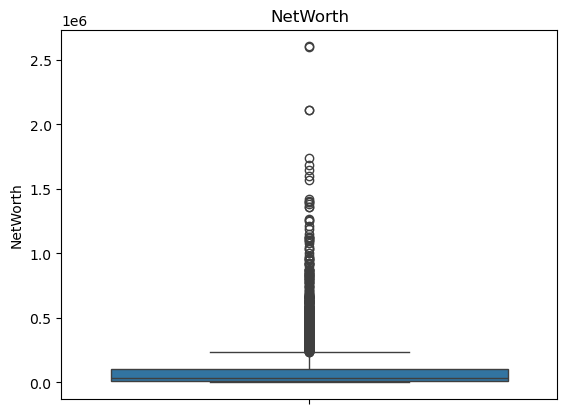

NetWorth sütununda toplam 829 aykırı değer var.
Alt sınır: -128459.0
Üst sınır: 239165.0
Aykırı değerler: [250291.0, 435808.0, 301790.0, 621711.0, 279531.0, 2603208.0, 279360.0, 314536.0, 321457.0, 278826.0] 



In [32]:
#Boxplot ile aykırı değer tespiti, alt ve üst sınıf incelemesi
import numpy as np

numeric_columns = df.select_dtypes(include=[np.number]).columns
exclude_columns = ["LoanApproved", "BankruptcyHistory"]
def handle_outliers(df, column):
    Q1, Q3 = df[column].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    
    outliers_before = df[(df[column] < lower) | (df[column] > upper)][column]
    outlier_count = len(outliers_before)

    if outlier_count == 0:
        print(f"\033[91m{column} sütununda aykırı değer yok.\033[0m\n")
        return
        
    sns.boxplot(data=df, y=column)
    plt.title(f"{column}")
    plt.show()
    print(f"\033[94m{column}\033[0m sütununda toplam \033[94m{outlier_count}\033[0m aykırı değer var.")
    print(f"Alt sınır: {lower}\nÜst sınır: {upper}")
    print("Aykırı değerler:", outliers_before.head(10).tolist(), "\n")

for col in numeric_columns:
    if col not in exclude_columns:
        handle_outliers(df, col)

In [33]:
#ANOVA Testi ile sayısal değişkenlerin kategorik değişkenlerle olan ilişkisine bakılması
from scipy.stats import f_oneway

categorical_columns = df.select_dtypes(include=['object', 'category']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

print("\033[94mKategorik Değişkenler:\033[0m", f"{categorical_columns}")
print("\033[94mSayısal Değişkenler:\033[0m", numerical_columns)

#Her kategorik değişken için tüm sayısal değişkenlerin kontrol edilmesi
for cat_col in categorical_columns:
    print(f"\n\033[94mKategorik Değişken:\033[0m {cat_col}")
    for num_col in numerical_columns:
        
        #Gruplara göre sayısal değerlerin alınıp eksik verilerin çıkarılması
        groups = [group[num_col].dropna() for _, group in df.groupby(cat_col, observed=False)]
        f_stat, p_value = f_oneway(*groups)
        print(f"  - {num_col}: F-statistic = {f_stat:.2f}, p-value = {p_value:.4f}")
        if p_value < 0.05:
            print(f"\033[92m!!! {num_col} kategorik değişken {cat_col} ile anlamlı bir ilişkiye sahip.\033[0m")

Kategorik Değişkenler: Index(['EmploymentStatus', 'EducationLevel'], dtype='object')
Sayısal Değişkenler: Index(['Age', 'AnnualIncome', 'CreditScore', 'LoanAmount', 'LoanDuration',
       'NumberOfDependents', 'CreditCardUtilizationRate',
       'NumberOfOpenCreditLines', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'PaymentHistory', 'SavingsAccountBalance', 'JobTenure', 'NetWorth',
       'LoanApproved'],
      dtype='object')

Kategorik Değişken: EmploymentStatus
  - Age: F-statistic = 0.08, p-value = 0.9257
  - AnnualIncome: F-statistic = 0.96, p-value = 0.3828
  - CreditScore: F-statistic = 1.94, p-value = 0.1442
  - LoanAmount: F-statistic = 1.14, p-value = 0.3190
  - LoanDuration: F-statistic = 0.20, p-value = 0.8170
  - NumberOfDependents: F-statistic = 0.53, p-value = 0.5883
  - CreditCardUtilizationRate: F-statistic = 1.77, p-value = 0.1701
  - NumberOfOpenCreditLines: F-statistic = 1.91, p-value = 0.1479
  - DebtToIncomeRatio: F-statistic = 0.42, p-value = 0.6596
  - Bank

In [34]:
#Orijinal indekslerin korunması için sütun eklenmesi
df['original_index'] = df.index

#Kategoriye bağlı aykırı değer baskılama
def suppress_outliers_by_group(df, group_column, column):
    def process_group(group):
        lower_limit = group[column].quantile(0.12)
        upper_limit = group[column].quantile(0.88)
        
        outliers_before = group[(group[column] < lower_limit) | (group[column] > upper_limit)][column]
        group[column] = np.clip(group[column], lower_limit, upper_limit)
        outliers_after = group.loc[outliers_before.index, column]
        
        print(f"\033[94m{column}\033[0m sütununda \033[94m{group.name}\033[0m grubunda \033[94m{len(outliers_before)}\033[0m aykırı değer bulundu.")
        print(f"Alt sınır: {lower_limit}\nÜst sınır: {upper_limit}")
        print(f"Baskılama öncesi: {outliers_before.tolist()[:5]}")
        print(f"Baskılama sonrası: {outliers_after.tolist()[:5]}\n")
        return group

    df_processed = df.groupby(group_column, group_keys=False, observed=False).apply(process_group, include_groups=False).reset_index(drop=True)
    return df

# Genel aykırı değer baskılama
def cap_outliers_general(df, column):
    Q1, Q3 = df[column].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    
    outliers_before = df[(df[column] < lower) | (df[column] > upper)][column]
    df[column] = np.clip(df[column], lower, upper)
    outliers_after = df.loc[outliers_before.index, column]
    
    print(f"\033[94m{column}\033[0m sütununda \033[94m{len(outliers_before)}\033[0m aykırı değer bulundu.")
    print(f"Alt sınır: {lower}\nÜst sınır: {upper}")
    print(f"Baskılama öncesi: {outliers_before.tolist()[:5]}")
    print(f"Baskılama sonrası: {outliers_after.tolist()[:5]}\n")
    return df

categorical_columns = ['EmploymentStatus', 'EducationLevel']
numeric_columns = df.select_dtypes(include=[np.number]).columns

education_related_columns = ["AnnualIncome", "CreditScore", "LoanAmount"]
employment_related_columns = ["PaymentHistory"]

#EducationLevel için ilişkili sayısal değişkenlerin aykırı değer baskılanması
for cat_col in ['EducationLevel']:
    for num_col in education_related_columns:
        if num_col in numeric_columns:
            df = suppress_outliers_by_group(df, group_column=cat_col, column=num_col)

#EmploymentStatus için ilişkili sayısal değişkenlerin aykırı değer baskılanması
for cat_col in ['EmploymentStatus']:
    for num_col in employment_related_columns:
        if num_col in numeric_columns:
            df = suppress_outliers_by_group(df, group_column=cat_col, column=num_col)

# İlişkisiz sayısal değişkenlerin baskılama
exclude_columns = ["LoanApproved", "BankruptcyHistory", "NumberOfDependents", "original_index"]
unrelated_columns = [col for col in numeric_columns if col not in exclude_columns + education_related_columns + employment_related_columns]
for col in unrelated_columns:
    df = cap_outliers_general(df, col)

df = df.sort_values('original_index').drop(columns=['original_index'])
df.to_excel("outliers_removed_dataset.xlsx", index=False)

print("\033[92mAykırı değer baskılama işlemi tamamlandı ve veriler dosyaya kaydedildi.\033[0m")

AnnualIncome sütununda High-School grubunda 620 aykırı değer bulundu.
Alt sınır: 23434.2
Üst sınır: 112789.40000000001
Baskılama öncesi: [15561.0, 124086.0, 15000.0, 19924.0, 139954.0]
Baskılama sonrası: [23434.2, 112789.40000000001, 23434.2, 23434.2, 112789.40000000001]

AnnualIncome sütununda Associate grubunda 458 aykırı değer bulundu.
Alt sınır: 25522.12
Üst sınır: 120662.36
Baskılama öncesi: [15059.0, 17676.0, 152650.0, 125711.0, 149736.0]
Baskılama sonrası: [25522.12, 25522.12, 120662.36, 120662.36, 120662.36]

AnnualIncome sütununda Bachelor grubunda 748 aykırı değer bulundu.
Alt sınır: 29078.16
Üst sınır: 128059.08
Baskılama öncesi: [15000.0, 142326.0, 163303.0, 272693.0, 24973.0]
Baskılama sonrası: [29078.16, 128059.08, 128059.08, 128059.08, 29078.16]

AnnualIncome sütununda Master grubunda 422 aykırı değer bulundu.
Alt sınır: 33139.6
Üst sınır: 137231.80000000002
Baskılama öncesi: [178310.0, 24914.0, 190445.0, 15120.0, 22901.0]
Baskılama sonrası: [137231.80000000002, 33139.6,

## **Eksik Veri Analizi ve Çözümü**

In [36]:
#Eksik verilerin gözlenmesi
df.isnull().sum()

Age                          34
AnnualIncome                 32
CreditScore                  33
EmploymentStatus              0
EducationLevel                0
LoanAmount                   34
LoanDuration                 33
NumberOfDependents           33
CreditCardUtilizationRate    33
NumberOfOpenCreditLines      33
DebtToIncomeRatio            33
BankruptcyHistory             0
PaymentHistory               33
SavingsAccountBalance         1
JobTenure                    34
NetWorth                     33
LoanApproved                  0
dtype: int64

In [37]:
#Sayısal değişkenlerin özet istatistikleri
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,9966.0,40.627835,11.416393,18.000000,33.000000,41.000000,48.000000,70.500000
AnnualIncome,9968.0,72787.766352,47897.462602,15000.000000,38217.500000,61043.000000,93937.250000,485341.000000
CreditScore,9967.0,575.412662,50.660929,362.000000,544.000000,582.000000,612.000000,712.000000
LoanAmount,9966.0,23140.097331,12685.390851,3674.000000,14505.250000,20302.000000,28476.250000,158686.000000
LoanDuration,9967.0,52.051370,21.943476,12.000000,36.000000,48.000000,60.000000,96.000000
NumberOfDependents,9967.0,1.509281,1.390129,0.000000,0.000000,1.000000,3.000000,5.000000
CreditCardUtilizationRate,9967.0,0.285595,0.158922,0.000974,0.160696,0.264436,0.389791,0.733434
NumberOfOpenCreditLines,9967.0,2.979833,1.671645,0.000000,2.000000,3.000000,4.000000,7.000000
DebtToIncomeRatio,9967.0,0.285835,0.159041,0.001720,0.160768,0.265934,0.389454,0.732482
BankruptcyHistory,10000.0,0.044900,0.207095,0.000000,0.000000,0.000000,0.000000,1.000000


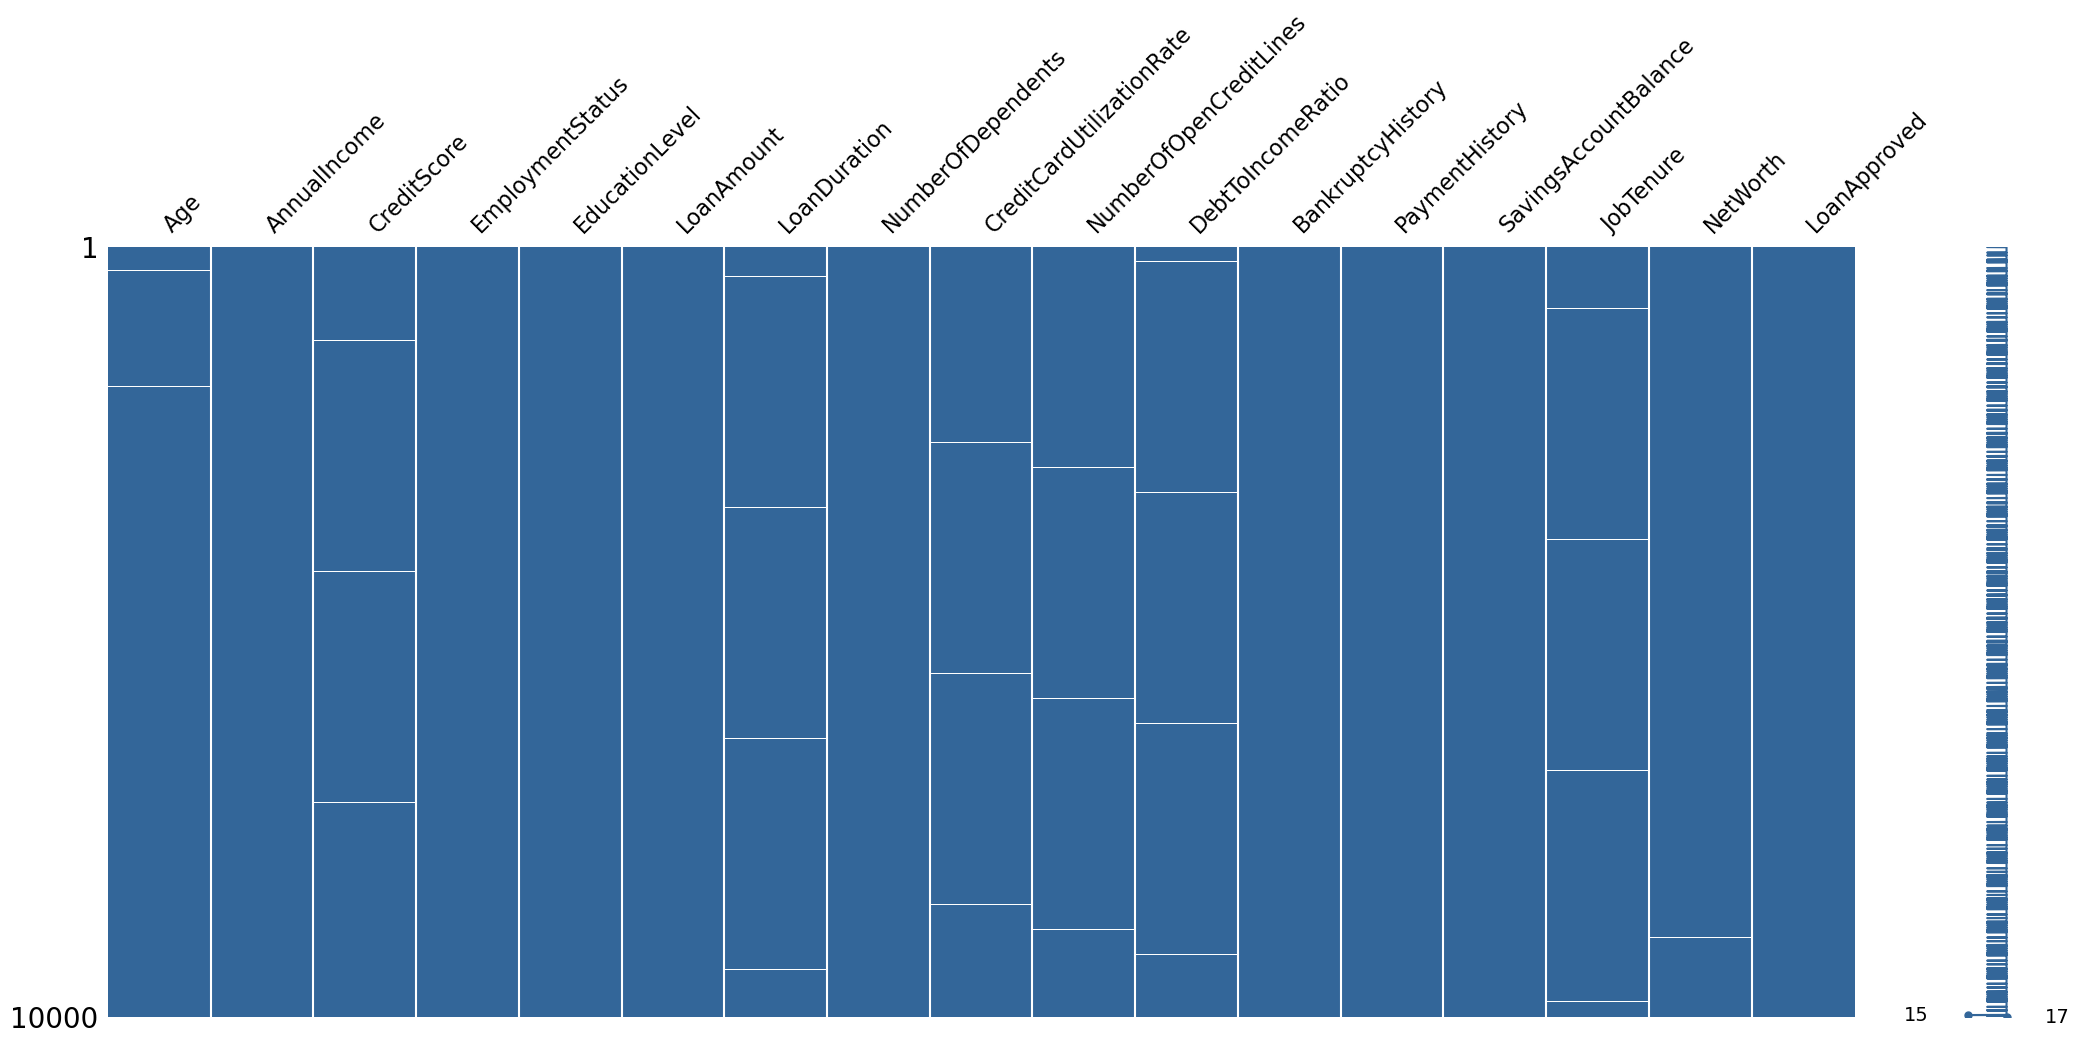

In [38]:
import missingno as msno

msno.matrix(df, color=(0.2, 0.4, 0.6), sparkline=True)
plt.show()

In [39]:
#EmploymentStatus kategorik değişkenine göre PaymentHistory sayısal değişkenindeki eksik verileri doldurma
def fill_payment_history(df):
    for employment_status in df['EmploymentStatus'].unique():
        employment_group = df[df['EmploymentStatus'] == employment_status]
        
        if employment_group['PaymentHistory'].isnull().sum() > 0:
            std = employment_group['PaymentHistory'].std()
            mean = employment_group['PaymentHistory'].mean()
            median = employment_group['PaymentHistory'].median()
            
            #Standart sapma düşükse ortalama, yüksekse medyana göre doldurma işlemi
            if std < mean * 0.2:
                fill_value = mean
                fill_method = "ortalama"
            else:
                fill_value = median
                fill_method = "medyan"
            
            df.loc[df['EmploymentStatus'] == employment_status, 'PaymentHistory'] = df.loc[df['EmploymentStatus'] == employment_status, 'PaymentHistory'].fillna(fill_value)
            print(f"\033[94mPaymentHistory\033[0m sütunu için \033[94m{employment_status}\033[0m grubunda \033[94m{fill_method} ({fill_value:.2f})\033[0m ile dolduruldu.")
    return df

#EducationLevel kategorik değişkenine göre AnnualIncome, CreditScore ve LoanAmount sayısal değişkenlerindeki eksik verileri doldurma
def fill_education_level(df):
    group_fill_columns = ['AnnualIncome', 'CreditScore', 'LoanAmount']
    
    for education_level in df['EducationLevel'].unique():
        education_group = df[df['EducationLevel'] == education_level]
        
        for column in group_fill_columns:
            if column in education_group.columns and education_group[column].isnull().sum() > 0:
                std = education_group[column].std()
                mean = education_group[column].mean()
                median = education_group[column].median()
                
                if std < mean * 0.2:
                    fill_value = mean
                    fill_method = "ortalama"
                else:
                    fill_value = median
                    fill_method = "medyan"
                
                df.loc[df['EducationLevel'] == education_level, column] = df.loc[df['EducationLevel'] == education_level, column].fillna(fill_value)
                print(f"\033[94m{column}\033[0m sütunu için \033[94m{education_level}\033[0m grubunda \033[94m{fill_method} ({fill_value:.2f})\033[0m ile dolduruldu.")
    return df

#Diğer sayısal değişkenlerdeki eksik verileri kendi sütunlarına göre doldurma
def fill_other_numerics(df, numeric_columns):
    for column in numeric_columns:
        if column in df.columns and df[column].isnull().sum() > 0:
            std = df[column].std()
            mean = df[column].mean()
            median = df[column].median()
            
            if std < mean * 0.2:
                fill_value = mean
                fill_method = "ortalama"
            else:
                fill_value = median
                fill_method = "medyan"
            
            df[column] = df[column].fillna(fill_value)
            print(f"\033[94m{column}\033[0m sütunundaki eksik veriler \033[94m{fill_method} ({fill_value:.2f})\033[0m ile dolduruldu.")
    return df

def fill_missing_values(df, numeric_columns):
    df = fill_payment_history(df)
    df = fill_education_level(df)
    df = fill_other_numerics(df, numeric_columns)
    return df

numeric_columns_in_df = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns = ['AnnualIncome', 'CreditScore', 'LoanAmount', 'PaymentHistory'] + numeric_columns_in_df

df = fill_missing_values(df, numeric_columns)

file_path = "updated_dataset.xlsx"
df.to_excel(file_path, index=False)
print(f"\n\033[92mVeri seti '{file_path}' dosyasına kaydedildi.\033[0m")

udf = pd.read_excel(file_path)
udf.head()

PaymentHistory sütunu için Employed grubunda medyan (24.00) ile dolduruldu.
PaymentHistory sütunu için Self-Employed grubunda medyan (24.00) ile dolduruldu.
PaymentHistory sütunu için Unemployed grubunda medyan (24.00) ile dolduruldu.
AnnualIncome sütunu için Master grubunda medyan (68827.50) ile dolduruldu.
CreditScore sütunu için Master grubunda ortalama (589.70) ile dolduruldu.
LoanAmount sütunu için Master grubunda medyan (19936.00) ile dolduruldu.
AnnualIncome sütunu için High-School grubunda medyan (51206.00) ile dolduruldu.
CreditScore sütunu için High-School grubunda ortalama (559.48) ile dolduruldu.
LoanAmount sütunu için High-School grubunda medyan (21041.00) ile dolduruldu.
AnnualIncome sütunu için Associate grubunda medyan (58955.00) ile dolduruldu.
CreditScore sütunu için Associate grubunda ortalama (569.03) ile dolduruldu.
LoanAmount sütunu için Associate grubunda medyan (20190.00) ile dolduruldu.
AnnualIncome sütunu için Bachelor grubunda medyan (63932.00) ile dolduruldu

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,LoanAmount,LoanDuration,NumberOfDependents,CreditCardUtilizationRate,NumberOfOpenCreditLines,DebtToIncomeRatio,BankruptcyHistory,PaymentHistory,SavingsAccountBalance,JobTenure,NetWorth,LoanApproved
0,41.0,39948.0,617.0,Employed,Master,13152.0,48,2,0.354418,1,0.358336,0,29,7632,10.5,126928,0
1,58.0,69084.0,545.0,Employed,High-School,37898.0,96,1,0.267587,2,0.436244,0,27,3010,5.0,99452,0
2,37.0,103264.0,594.0,Employed,Associate,9184.0,36,1,0.264436,0,0.078884,0,26,1555,5.0,227019,1
3,37.0,178310.0,626.0,Self-Employed,Master,15433.0,72,0,0.102211,5,0.259366,0,16,2118,5.0,27071,1
4,49.0,97345.0,516.0,Employed,High-School,19634.0,12,5,0.209768,5,0.395568,0,19,781,5.0,38621,1


In [40]:
udf.isnull().sum()

Age                          0
AnnualIncome                 0
CreditScore                  0
EmploymentStatus             0
EducationLevel               0
LoanAmount                   0
LoanDuration                 0
NumberOfDependents           0
CreditCardUtilizationRate    0
NumberOfOpenCreditLines      0
DebtToIncomeRatio            0
BankruptcyHistory            0
PaymentHistory               0
SavingsAccountBalance        0
JobTenure                    0
NetWorth                     0
LoanApproved                 0
dtype: int64

## **Değişken Dönüşümü**

### **One-Hot Dönüşümü**

In [43]:
from sklearn.preprocessing import OneHotEncoder

#Encoding işlemi
encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' ile dummy değişken tuzağını önleme
encoded_columns = encoder.fit_transform(udf[['EmploymentStatus', 'EducationLevel']])

#Yeni sütun adlarının alınması
encoded_feature_names = encoder.get_feature_names_out(['EmploymentStatus', 'EducationLevel'])

#One-Hot Encoded sütunlarını Dataframe'e dönüştürme
udf_encoded = pd.DataFrame(encoded_columns, columns=encoded_feature_names)

#Orijinal veriye encoded sütunlarının eklenmesi ve eski kategorik sütunların kaldırılması
udf_final = pd.concat([udf.drop(['EmploymentStatus', 'EducationLevel'], axis=1), udf_encoded], axis=1)

file_path = "converted_loan.xlsx"
udf_final.to_excel(file_path, index=False)
print(f"\033[92mGüncellenmiş veri seti '{file_path}' olarak kaydedildi.\033[0m", "\n")

cdf = pd.read_excel(file_path)
cdf.head()

Güncellenmiş veri seti 'converted_loan.xlsx' olarak kaydedildi. 



,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,CreditCardUtilizationRate,NumberOfOpenCreditLines,DebtToIncomeRatio,BankruptcyHistory,...,SavingsAccountBalance,JobTenure,NetWorth,LoanApproved,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High-School,EducationLevel_Master
0,41.0,39948.0,617.0,13152.0,48,2,0.354418,1,0.358336,0,...,7632,10.5,126928,0,0,0,0,0,0,1
1,58.0,69084.0,545.0,37898.0,96,1,0.267587,2,0.436244,0,...,3010,5.0,99452,0,0,0,0,0,1,0
2,37.0,103264.0,594.0,9184.0,36,1,0.264436,0,0.078884,0,...,1555,5.0,227019,1,0,0,0,0,0,0
3,37.0,178310.0,626.0,15433.0,72,0,0.102211,5,0.259366,0,...,2118,5.0,27071,1,1,0,0,0,0,1
4,49.0,97345.0,516.0,19634.0,12,5,0.209768,5,0.395568,0,...,781,5.0,38621,1,0,0,0,0,1,0


## **Sınıflandırma Modelleri**

### **Logistic Regression**

Fitting 5 folds for each of 20 candidates, totalling 100 fits

En İyi Hiperparametreler: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

5-Kat Çapraz Doğrulama Ortalama Doğruluk: 0.8882
5-Kat Çapraz Doğrulama Standart Sapma: 0.0086

Accuracy: 0.8760
Precision: 0.8760
Recall: 0.8760
F1 Score: 0.8760

Sınıf Bazlı Rapor (Duyarlılık):
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      1018
           1       0.87      0.87      0.87       982

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000



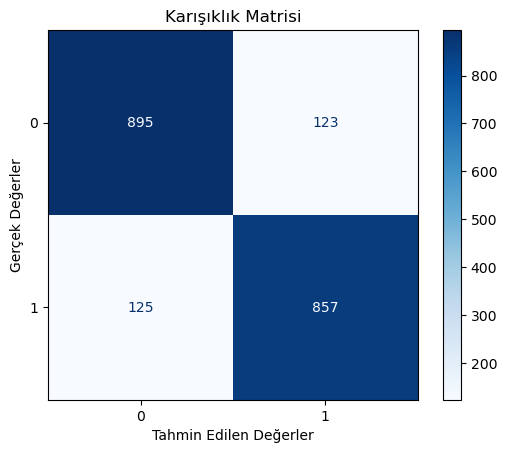

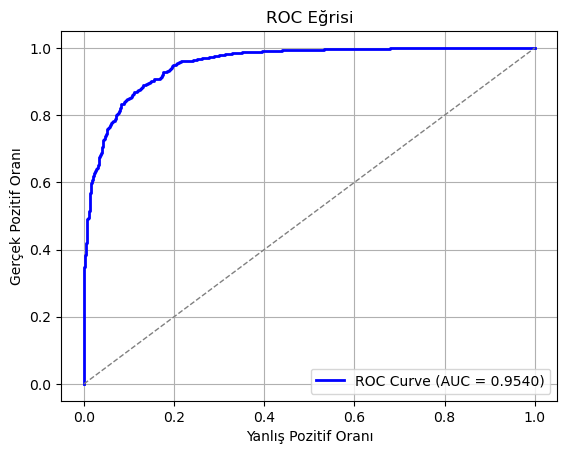

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X = cdf.drop('LoanApproved', axis=1)
y = cdf['LoanApproved']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#StandardScaler ile ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Model Tuning
log_reg = LogisticRegression(max_iter=5000)

#Hiperparametreler
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100], # Regularization gücünü kontrol eden parametre
    'solver': ['liblinear', 'saga'], # Çözümleme algoritmaları
    'penalty': ['l1', 'l2'] # Regularization türü
}

#GridSearchCV tanımlama ve eğitme
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

#En iyi modelin ve hiperparametrelerin belirlenmesi
best_lg = grid_search.best_estimator_
print("\nEn İyi Hiperparametreler:", grid_search.best_params_)

#K-Kat Çapraz Doğrulama Sonuçları
cv_results = cross_val_score(best_lg, X_train_scaled, y_train, cv=5, scoring='accuracy') #K'nın dengeli ölçeklendirme için 5 alınması
print(f"\n5-Kat Çapraz Doğrulama Ortalama Doğruluk: {cv_results.mean():.4f}")
print(f"5-Kat Çapraz Doğrulama Standart Sapma: {cv_results.std():.4f}")

#Test seti tahmini
y_pred = best_lg.predict(X_test_scaled)

#Performans metrikleri
accuracy_log_reg = accuracy_score(y_test, y_pred)
precision_log_reg = precision_score(y_test, y_pred, average='weighted')
recall_log_reg = recall_score(y_test, y_pred, average='weighted')
f1_log_reg = f1_score(y_test, y_pred, average='weighted')
print(f"\nAccuracy: {accuracy_log_reg:.4f}")
print(f"Precision: {precision_log_reg:.4f}")
print(f"Recall: {recall_log_reg:.4f}")
print(f"F1 Score: {f1_log_reg:.4f}")
print("\nSınıf Bazlı Rapor (Duyarlılık):\n", classification_report(y_test, y_pred))

#Karışıklık matrisi
cm = confusion_matrix(y_test, y_pred)
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_lg.classes_)
disp_log_reg.plot(cmap="Blues", values_format="d")
plt.xlabel("Tahmin Edilen Değerler")
plt.ylabel("Gerçek Değerler")
plt.title('Karışıklık Matrisi')
plt.show()

#ROC-AUC Eğrisi
# Olasılık tahminlerini elde etme
y_proba = best_lg.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba) #ROC eğrisi
roc_auc_log_reg = roc_auc_score(y_test, y_proba) #AUC hesaplama

plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_log_reg:.4f})')
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')  # Rastgele tahmin çizgisi
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Gerçek Pozitif Oranı')
plt.title('ROC Eğrisi')
plt.legend(loc="lower right")
plt.grid()
plt.show()

### **Random Forest**

Fitting 5 folds for each of 108 candidates, totalling 540 fits

En İyi Hiperparametreler: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

5-Kat Çapraz Doğrulama Ortalama Doğruluk: 0.8811
5-Kat Çapraz Doğrulama Standart Sapma: 0.0096

Accuracy: 0.8710
Precision: 0.8711
Recall: 0.8710
F1 Score: 0.8710

Sınıf Bazlı Rapor (Duyarlılık):
               precision    recall  f1-score   support

           0       0.88      0.87      0.87      1018
           1       0.86      0.87      0.87       982

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



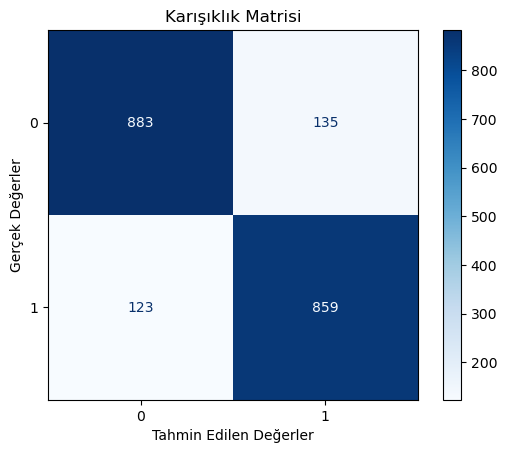

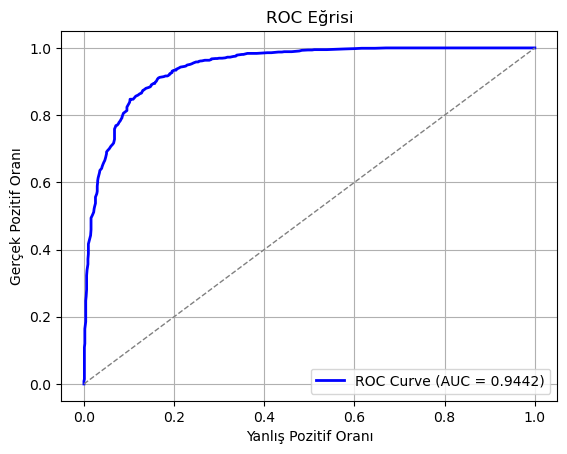

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd

X = cdf.drop('LoanApproved', axis=1)
y = cdf['LoanApproved']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Tuning
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300], #Ağaç sayısı
    'max_depth': [None, 10, 20, 30], #Her bir ağacın maksimum derinliği
    'min_samples_split': [2, 5, 10], #Bir düğümün bölünmesi için gereken minimum örnek sayısını
    'min_samples_leaf': [1, 2, 4] #Her bir yaprak düğümünde bulunması gereken minimum örnek sayısını
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print("\nEn İyi Hiperparametreler:", grid_search.best_params_)

cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='accuracy')
print(f"\n5-Kat Çapraz Doğrulama Ortalama Doğruluk: {cv_scores.mean():.4f}")
print(f"5-Kat Çapraz Doğrulama Standart Sapma: {cv_scores.std():.4f}")

y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nSınıf Bazlı Rapor (Duyarlılık):\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.xlabel("Tahmin Edilen Değerler")
plt.ylabel("Gerçek Değerler")
plt.title('Karışıklık Matrisi')
plt.show()

y_proba = best_rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Gerçek Pozitif Oranı')
plt.title('ROC Eğrisi')
plt.legend(loc="lower right")
plt.grid()
plt.show()

### **XGBoost**

Fitting 5 folds for each of 243 candidates, totalling 1215 fits

En İyi Hiperparametreler: {'colsample_bytree': 0.6, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.6}

5-Kat Çapraz Doğrulama Ortalama Doğruluk: 0.8895
5-Kat Çapraz Doğrulama Standart Sapma: 0.0107

Accuracy: 0.8795
Precision: 0.8796
Recall: 0.8795
F1 Score: 0.8795

Sınıf Bazlı Rapor (Duyarlılık):
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      1018
           1       0.87      0.88      0.88       982

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000



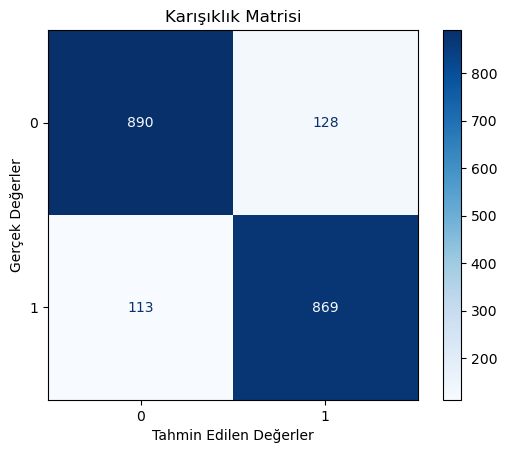

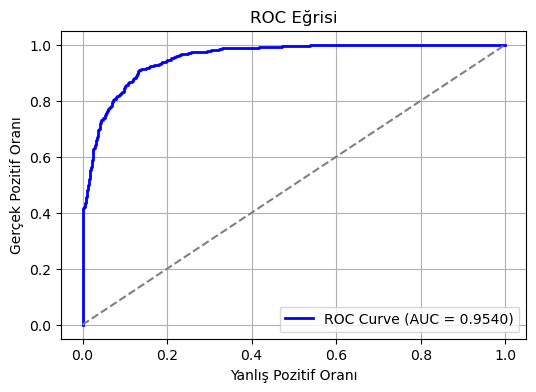

In [50]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

X = cdf.drop('LoanApproved', axis=1)
y = cdf['LoanApproved']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Model Tuning
xgb = XGBClassifier(random_state=42, eval_metric='mlogloss')
param_grid = {
    'n_estimators': [100, 200, 300], #Ağaç sayısı
    'learning_rate': [0.01, 0.1, 0.2], #Öğrenme oranı
    'max_depth': [3, 5, 7], #Her bir karar ağacının maksimum derinliği
    'subsample': [0.6, 0.8, 1.0], #Her ağaç oluşturulurken kullanılacak veri oranını
    'colsample_bytree': [0.6, 0.8, 1.0] #Her karar ağacı oluşturulurken kullanılacak özelliklerin oranını
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_
print("\nEn İyi Hiperparametreler:", grid_search.best_params_)

cv_scores = cross_val_score(best_xgb, X_train, y_train, cv=5, scoring='accuracy')
print(f"\n5-Kat Çapraz Doğrulama Ortalama Doğruluk: {cv_scores.mean():.4f}")
print(f"5-Kat Çapraz Doğrulama Standart Sapma: {cv_scores.std():.4f}")

y_pred = best_xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nSınıf Bazlı Rapor (Duyarlılık):\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_xgb.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.xlabel("Tahmin Edilen Değerler")
plt.ylabel("Gerçek Değerler")
plt.title('Karışıklık Matrisi')
plt.show()

y_proba = best_xgb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Gerçek Pozitif Oranı')
plt.title('ROC Eğrisi')
plt.legend(loc="lower right")
plt.grid()
plt.show()

### **LightGBM**

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[LightGBM] [Info] Number of positive: 3798, number of negative: 4202
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000440 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1908
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.474750 -> initscore=-0.101086
[LightGBM] [Info] Start training from score -0.101086

En iyi hiperparametreler: {'learning_rate': 0.05, 'max_depth': 20, 'n_estimators': 100, 'num_leaves': 31}
[LightGBM] [Info] Number of positive: 3038, number of negative: 3362
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000308 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1903
[LightGBM]

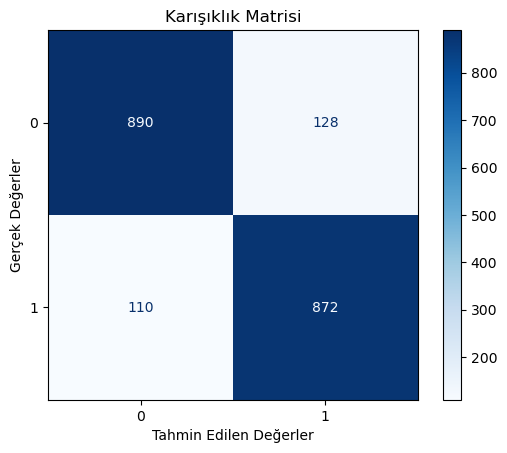

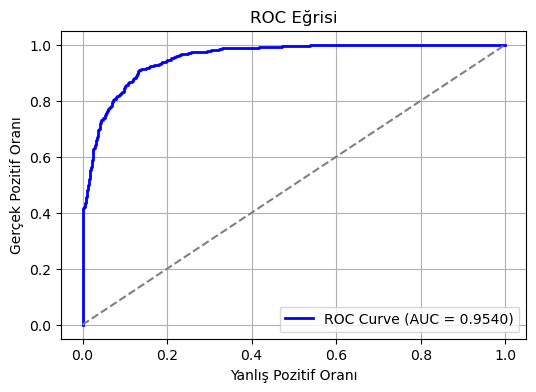

In [52]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

X = cdf.drop('LoanApproved', axis=1)
y = cdf['LoanApproved']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model tuning
lgb_model = lgb.LGBMClassifier(random_state=42)

param_grid = {
    "num_leaves": [31, 50, 70], #Bir karar ağındaki maksimum yaprak sayısı
    "max_depth": [10, 20, 30, -1], #Her bir karar ağacının maksimum derinliği
    "learning_rate": [0.01, 0.05, 0.1], #Öğrenme oranı
    "n_estimators": [100, 200, 300] #Ağaç sayısı
}

grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, scoring="f1_weighted", verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_lgb = grid_search.best_estimator_
print(f"\nEn iyi hiperparametreler: {grid_search.best_params_}")

cv_scores = cross_val_score(best_lgb, X_train, y_train, cv=5, scoring='accuracy')
print(f"\n5-Kat Çapraz Doğrulama Ortalama Doğruluk: {cv_scores.mean():.4f}")
print(f"5-Kat Çapraz Doğrulama Standart Sapma: {cv_scores.std():.4f}")

y_pred = best_lgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")
print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nSınıf Bazlı Rapor (Duyarlılık):\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_lgb.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.xlabel("Tahmin Edilen Değerler")
plt.ylabel("Gerçek Değerler")
plt.title('Karışıklık Matrisi')
plt.show()

y_proba = best_xgb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Gerçek Pozitif Oranı')
plt.title('ROC Eğrisi')
plt.legend(loc="lower right")
plt.grid()
plt.show()

[LightGBM] [Info] Number of positive: 3798, number of negative: 4202
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000676 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1899
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.474750 -> initscore=-0.101086
[LightGBM] [Info] Start training from score -0.101086

Logistic Regression:
Accuracy: 0.8760
Precision: 0.8745
Recall: 0.8727
F1 Score: 0.8736
ROC-AUC: 0.9540

Random Forest:
Accuracy: 0.8740
Precision: 0.8687
Recall: 0.8758
F1 Score: 0.8722
ROC-AUC: 0.9434

XGBoost:
Accuracy: 0.8700
Precision: 0.8691
Recall: 0.8656
F1 Score: 0.8673
ROC-AUC: 0.9475

LightGBM:
Accuracy: 0.8770
Precision: 0.8710
Recall: 0.8798
F1 Score: 0.8754
ROC-AUC: 0.9498


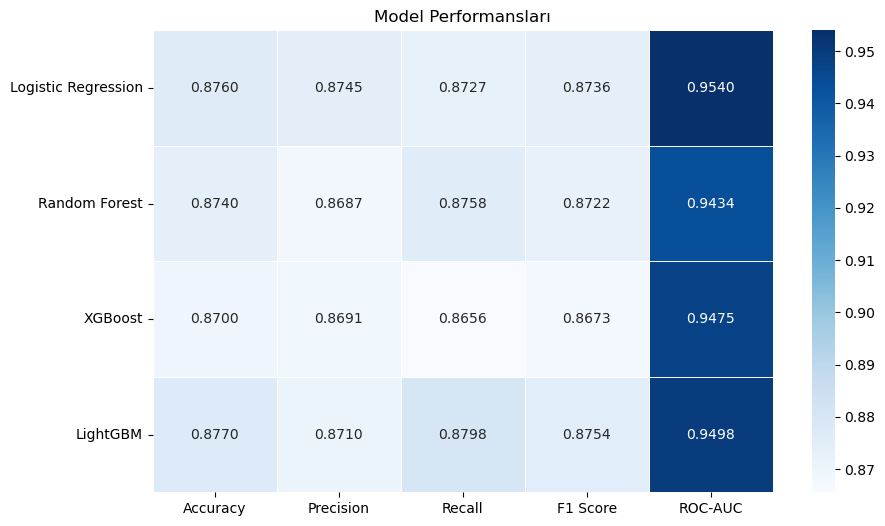

In [53]:
from xgboost import XGBClassifier

#Modellerin performanslarının karşılaştırılması ve ideal olan modelin bulunması
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelleri tanımlama
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),  # max_iter artırıldı
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'LightGBM': lgb.LGBMClassifier()
}

# Model sonuçlarını depolamak için bir dictionary
model_results = {}

# Modelleri eğitme ve değerlendirme
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Ölçeklenmiş verilerle model eğitme
    y_pred = model.predict(X_test_scaled)  # Test setinde tahmin yapma
    y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Pozitif sınıfın olasılıkları (AUC için)

    # Performans metriklerini hesaplama
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_prob)

    # Sonuçları saklama
    model_results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC-AUC': auc_roc
    }

# Sonuçları yazdırma
for model_name, metrics in model_results.items():
    print(f"\n{model_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC']
results_df = pd.DataFrame(model_results).T[metrics]

plt.figure(figsize=(10, 6))
sns.heatmap(results_df, annot=True, cmap="Blues", fmt=".4f", linewidths=0.5)
plt.title("Model Performansları")
plt.show()

## **PCA ile Boyut Azaltma**

In [55]:
from sklearn.decomposition import PCA

X = cdf.drop(columns=['LoanApproved'])
y = cdf['LoanApproved']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA ile boyut azaltma
pca = PCA(n_components=0.95)  #Verinin %95'ini koruma
X_pca = pca.fit_transform(X_scaled)

# Boyutlar hakkında bilgi edinme
print(f"Orijinal veri seti boyutu: {X.shape}")
print(f"PCA sonrası veri seti boyutu: {X_pca.shape}")

print(f"\nDeğişkenlerin korunma oranları: {pca.explained_variance_ratio_}")
print(f"Toplam verilerin korunma oranı: {sum(pca.explained_variance_ratio_):.2f}\n")

# PCA sonrası boyut azaltılmış veriyi DataFrame'e dönüştürme
columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
X_pca_df = pd.DataFrame(X_pca, columns=columns)

# Hedef değişkeni (loanapproved) ekleyelim
X_pca_df['LoanApproved'] = y

file_path = 'pca_dataset.xlsx'
X_pca_df.to_excel(file_path, index=False)

print(f"\033[92mVeri seti başarıyla '{file_path}' olarak kaydedildi.\033[0m")

Orijinal veri seti boyutu: (10000, 20)
PCA sonrası veri seti boyutu: (10000, 18)

Değişkenlerin korunma oranları: [0.08151725 0.06841794 0.05957635 0.05461787 0.05415775 0.0523509
 0.0516215  0.051476   0.05090903 0.05018664 0.04994299 0.04960685
 0.04897197 0.0485827  0.0481503  0.04738878 0.04525145 0.04466737]
Toplam verilerin korunma oranı: 0.96

Veri seti başarıyla 'pca_dataset.xlsx' olarak kaydedildi.


Fitting 5 folds for each of 20 candidates, totalling 100 fits

En İyi Hiperparametreler: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

5-Kat Çapraz Doğrulama Ortalama Doğruluk: 0.8810
5-Kat Çapraz Doğrulama Standart Sapma: 0.0104

Accuracy: 0.8740
Precision: 0.8741
Recall: 0.8740
F1 Score: 0.8740

Sınıf Bazlı Rapor (Duyarlılık):
               precision    recall  f1-score   support

           0       0.87      0.88      0.88      1018
           1       0.88      0.86      0.87       982

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



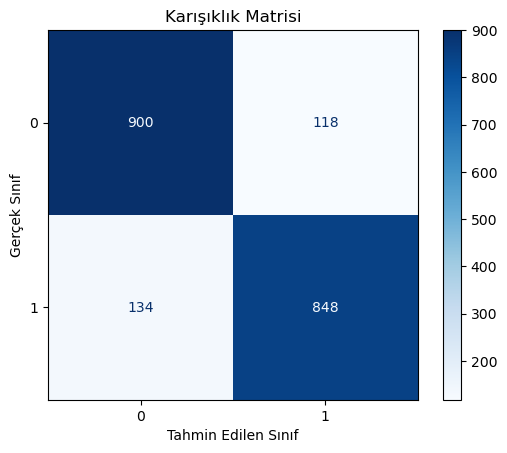

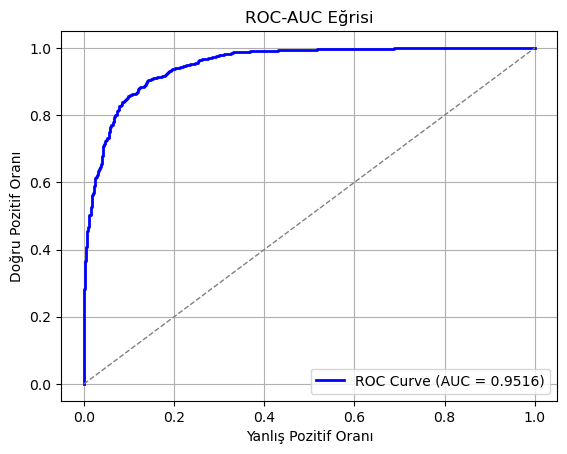

In [56]:
#Boyutu azaltılmış veri setine Logistic Regression uygulanması
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Model Tuning
log_reg_last = LogisticRegression(random_state=42, max_iter=1000)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(estimator=log_reg_last, param_grid=param_grid, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_lgl = grid_search.best_estimator_
print("\nEn İyi Hiperparametreler:", grid_search.best_params_)

cv_results = cross_val_score(best_lgl, X_train, y_train, cv=5, scoring='accuracy')
print(f"\n5-Kat Çapraz Doğrulama Ortalama Doğruluk: {cv_results.mean():.4f}")
print(f"5-Kat Çapraz Doğrulama Standart Sapma: {cv_results.std():.4f}")

y_pred = best_lgl.predict(X_test)

accuracy_log_reg_last = accuracy_score(y_test, y_pred)
precision_log_reg_last = precision_score(y_test, y_pred, average='weighted')
recall_log_reg_last = recall_score(y_test, y_pred, average='weighted')
f1_score_log_reg_last = f1_score(y_test, y_pred, average='weighted')
print(f"\nAccuracy: {accuracy_log_reg_last:.4f}")
print(f"Precision: {precision_log_reg_last:.4f}")
print(f"Recall: {recall_log_reg_last:.4f}")
print(f"F1 Score: {f1_score_log_reg_last:.4f}")
print("\nSınıf Bazlı Rapor (Duyarlılık):\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp_log_reg_last = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_lgl.classes_)
disp_log_reg_last.plot(cmap="Blues", values_format="d")
plt.xlabel("Tahmin Edilen Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.title("Karışıklık Matrisi")
plt.show()

y_proba = best_lgl.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc_log_reg_last = roc_auc_score(y_test, y_proba)

plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_log_reg_last:.4f})')
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı')
plt.title('ROC-AUC Eğrisi')
plt.legend(loc="lower right")
plt.grid()
plt.show()

      Metric  Original Data Set  Reduced Data Set
0   Accuracy           0.876000          0.874000
1  Precision           0.875997          0.874060
2     Recall           0.876000          0.874000
3   F1 Score           0.875998          0.873974
4    Roc-AUC           0.953997          0.951627


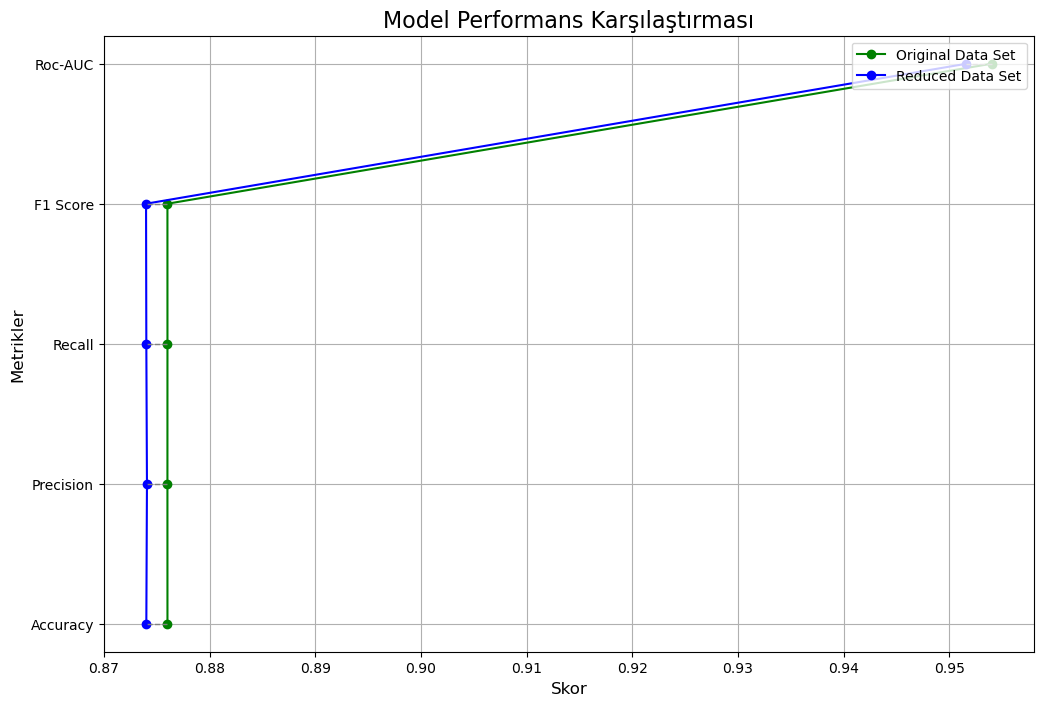

In [57]:
# Orijinal veri seti modelinin sonuçları
first_model_accuracy = accuracy_log_reg
first_model_precision = precision_log_reg
first_model_recall = recall_log_reg
first_model_f1 = f1_log_reg
first_model_auc = roc_auc

# Boyutu azaltılmış veri seti modelinin sonuçları
second_model_accuracy = accuracy_log_reg_last
second_model_precision = precision_log_reg_last
second_model_recall = recall_log_reg_last
second_model_f1 = f1_score_log_reg_last
second_model_auc = roc_auc_log_reg_last

# Sonuçları DataFrame'e dökme
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Roc-AUC'],
    'Original Data Set': [first_model_accuracy, first_model_precision, first_model_recall, first_model_f1, first_model_auc],
    'Reduced Data Set': [second_model_accuracy, second_model_precision, second_model_recall, second_model_f1, second_model_auc]
})
print(results)

# Slope Chart için görselleştirme
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(results['Original Data Set'], results['Metric'], marker='o', label='Original Data Set', color='green')
ax.plot(results['Reduced Data Set'], results['Metric'], marker='o', label='Reduced Data Set', color='blue')
for i in range(len(results)):
    ax.plot([results['Original Data Set'][i], results['Reduced Data Set'][i]], 
            [i, i], color='gray', linestyle='--', lw=1)
plt.title('Model Performans Karşılaştırması', fontsize=16)
plt.xlabel('Skor', fontsize=12)
plt.ylabel('Metrikler', fontsize=12)
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

## **Genel Değerlendirme**
- Orijinal veri setine uygulanan Lojistik Regresyon modelinin doğruluk (accuracy), kesinlik (precision), duyarlılık (recall), F1 skoru ve ROC-AUC değerlerine bakıldığında boyutu azaltılmış veri setine uygulanan Lojistik Regresyon metriklerine göre aralarındaki fark küçük miktarda olmasına rağmen daha yüksek performans sergilediği görülüyor.